## 快速连通物体检测算法
**在一张二值化后的图片中检测哪些像素属于一个物体块**

### 算法流程
初始化一个标签值l=0  
创建一个与输入图像大小相同的输出图像，所有像素初始化为0    
创建一个空的等价表equivalent_labels，用于存储标记的等价关系  
两次遍历
1. 从上到下，从左到右，遍历所有像素点。只要遇到像素值为1，则判断它周围(4/8邻接的左上部分)是否有像素已经被标记：  
    若没有，则标签值+1，并将该像素点标记为新的标签值  
    若只有一种标记值，则将标签值赋给该像素点  
    若有多种不同的标记值，则最小的标签值赋给该像素点，在等价表中记录这两个标记是等价的，例如 equivalent_labels[label_s] = label_l  
2.  在开始第二遍之前，遍历等价表，使用并查集算法将所有等价标记统一成一个最终的标记。  
    再次从左到右，从上到下，遍历第一遍生成的输出图像。对于每一个非零像素 (x, y)：查找其当前标记的最终根标记。用这个根标记值更新 (x, y) 的像素值。
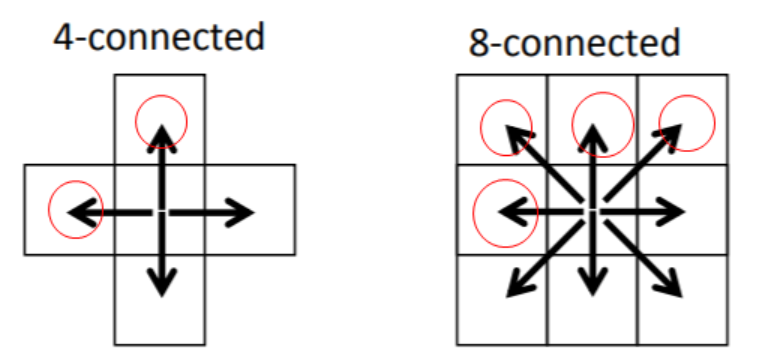

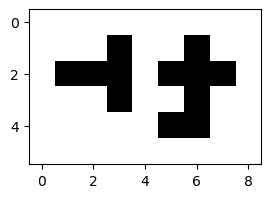

In [20]:
import numpy as np
import matplotlib.pyplot as plt

img_mat = np.array([[0, 0, 1, 0, 0, 1, 0],
                    [1, 1, 1, 0, 1, 1, 1],
                    [0, 0, 1, 0, 0, 1, 0],
                    [0, 0, 0, 0, 1, 1, 0]], dtype=np.int8)

img_mat = np.pad(img_mat, pad_width=(1,1), mode='constant', constant_values=0)
plt.figure(figsize=(3, 3))
plt.imshow(img_mat,cmap='gray_r')
plt.show()


In [21]:
def fast_connected_component(img_mat):
    label = 0
    equivalent_labels = [] # (s, l) 表示s是l的父节点，s<l
    output = np.zeros_like(img_mat, dtype=np.int8)

    for row in range(img_mat.shape[0]):
        for col in range(img_mat.shape[1]):
            if img_mat[row, col] == 0:
                continue
            # 安全地获取上、左邻域的标签，避免索引错误
            label_up = output[row-1, col] if row > 0 else 0
            label_left = output[row, col-1] if col > 0 else 0
            if label_up+label_left == 0: # 周围没有标签
                label += 1
                output[row, col] = label
            elif label_up == label_left: # 周围有标签且标签相同
                output[row, col] = label_up
            else: # 周围有标签且标签不同 （可能是一个有，一个没有）
                l = max(label_up, label_left)
                s = min(label_up, label_left)
                if s != 0:
                    output[row, col] = s
                    equivalent_labels.append((s, l)) # 记录等价类
                else:
                    output[row, col] = l

    parent = list(range(label + 1)) # parent[i]表示i的父节点，若为0则表示i为根节点


    def find(i):
        if parent[i] == i:
            return i
        # 路径压缩：直接将 i 的父节点设为根节点
        parent[i] = find(parent[i])
        return parent[i]
    def union(i, j):
        root_i = find(i)
        root_j = find(j)
        if root_i != root_j:
            parent[root_j] = root_i
    for s, l in equivalent_labels:
        union(s, l)

    for row in range(output.shape[0]):
        for col in range(output.shape[1]):
            if output[row, col] != 0:
                output[row, col] = find(output[row, col])
    return output


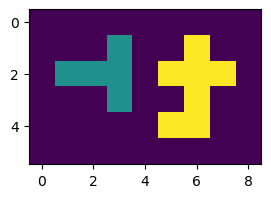

In [23]:
new_img = fast_connected_component(img_mat.copy())
plt.figure(figsize=(3, 3))
plt.imshow(new_img)